## Homework 3: Implement NN from Scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#### Load the dataset

In [2]:
df=pd.read_csv('winequality-white.csv', sep = ';')
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X = (X-min_vals)/(max_vals-min_vals) 

# train set and test set preparation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
y_train =  np.expand_dims(y_train, axis=1)
y_test =  np.expand_dims(y_test, axis=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Data shape: X: (4898, 11) Y: (4898,)
(3428, 11) (1470, 11)
(3428, 1) (1470, 1)


#### Task 1: Activation functions. 5 points

1.1 Implement the ReLU function. 

In [3]:
def sigm(z):
    return 1/(1 + np.exp(-z))

def dsigm(z):
    return sigm(z)*(1 - sigm(z))

def softmax(z):
    '''   
        parameter: z: m_batch * n_features
        return: m_batch * n_features
            
    '''
    b = np.exp(z - np.max(z, axis = 1, keepdims = True))# np.max(z)
    return b / np.sum(b, axis = 1, keepdims = True)


def ReLU(z):
    ''' The ReLU function
    
        parameter:
            z: m_batch * n_features
        return: m_batch * n_features
            
    '''
    #-----add your code here----

    return np.maximum(0, z)
    
    #-------------------------
    
z = np.array([[-1, 2, -3], [4, -2, 4]])
print('softmax output:\n', softmax(z))
print('ReLU output:\n', ReLU(z))

softmax output:
 [[0.04712342 0.94649912 0.00637746]
 [0.49938108 0.00123784 0.49938108]]
ReLU output:
 [[0 2 0]
 [4 0 4]]


#### Task 2: Create the lalyer class. 25 points

    2.1 Implement the Xavier initialization to initilize W and bias. 10 points
    2.2 Complete the run function. 5 points
    2.3 Create layers and process data samples. 10 poits

In [4]:
class Layer:
   
    def __init__(self, units, input_dim, activation = None): 
        #Student can use any method. But cannot initialize W and bias as zeros.

        self.units = units
        self.activation = activation
        self.input_dim = input_dim
        
        np.random.seed(0)
        
        # 2.1 Implement the Xavier initialization to initilize W and bias 
        #check here: https://www.deeplearning.ai/ai-notes/initialization/
        ## add you code here-------------
 
        limit = np.sqrt(6 / (input_dim + units))
        self.W = np.random.uniform(-limit, limit, (units, input_dim))
        
        self.b = np.full((units, 1), 0.01)
        
        ##----------------------
        
        self.gW = np.zeros((units, input_dim))
        self.gb = np.zeros((units,1))
        
    def run(self, inputs):
        ''' calculate the net input and activation output of the current layer
        
            inputs=(n_sample * n_features)
          
            return the activation output
        '''
        #calculate the net input
        
        self.net = np.dot(inputs, self.W.T) + self.b.T
       
        #2.2 activation output 
        ## add you code here--------

        if self.activation == 'sigmoid':
            self.output = sigm(self.net)
        elif self.activation == 'ReLU':
            self.output = ReLU(self.net)
        elif self.activation == 'softmax':
            self.output = softmax(self.net)
        elif self.activation is None:
            self.output = self.net
        else:
            raise ValueError("Unsupported activation function")
        
        ##------------------------------     
        return self.output

In [5]:
## 2.3 create a liner and non-linear layers with 2 nodes/units, input the first two training samples, and print the output

#add your code here----------------------
# create a linear layer with 2 nodes/units and print out for processing the first two samples

linear_layer = Layer(units=2, input_dim=X_train.shape[1], activation=None)
linear_output = linear_layer.run(X_train[:2])
print("Linear layer output for the first two samples:\n", linear_output)

# create a non-linear layers with 2 nodes/units and the sigmoid activation and print out for processing the first two samples

non_linear_layer = Layer(units=2, input_dim=linear_layer.units, activation='sigmoid')
non_linear_output = non_linear_layer.run(linear_output)
print("Non-linear layer (sigmoid) output for the first two samples:\n", non_linear_output)

#----------------------------------

Linear layer output for the first two samples:
 [[0.36462105 0.24630713]
 [0.75257756 1.08837935]]
Non-linear layer (sigmoid) output for the first two samples:
 [[0.54572851 0.53217071]
 [0.66232525 0.57910358]]


#### Task 3: Create NN. 50 points

    3.1 Implement the loss function. 5 points
    3.2 Complete the following 'train' function. 10 points
    3.3 Implement the BP algorithm. CS 474 students will earn 10 extra points for processing more than three layers. It is required for CS574 students to implement BP for processing more than 3 layers. 30 points
    3.4 update all weights and bias. 5 points 

In [6]:
class NeuralNetwork:
    
    def __init__(self):
        self.layers=[] #list of layers
        
    def add(self, units, input_dim, activation = None):
        '''add layers to NN
            
            units: the number of nodes
            input_dims: input dimensions
            activation: activation fundtions
        
        '''
        layer = Layer(units, input_dim, activation)
        self.layers.append(layer)
    
    def forward_prop(self, inputs):
        '''forward propagation calculates net input and output for each layer
        
            inputs: input data(n_samples * n_features)
            return the output of the last layer: n_samples * n_output_nodes
            
        '''
        
        nLayers = len(self.layers)
        #print(nLayers)
        for i in range(nLayers):
            out = self.layers[i].run(inputs)
            inputs = out   
        return out
    
    # 3.1 implement the loss function. 5 points
    def loss(self, y_pred, y):
        '''loss function: 1/(2*n_samples)*sum_samples((y_i-y_pred_i)**2)
            y_pred: predictions(n_samples * 1)
            y: target(n_samples * 1)
        '''
        #add your code here-------------------

        n_samples = y.shape[0]
        loss_value = (1 / (2 * n_samples)) * np.sum((y - y_pred) ** 2)
        return loss_value
        
        #------------------------------------
    
    # implement the prediction function.
    def predict(self, x):
        '''predict
            x: input(n_samples * n_features) 
            return predicted values
        '''
        out = self.forward_prop(x)
        return out
         

    #3.2 complete the following 'train' function. 10 points
    def train(self, inputs, targets, lr = 0.001, batch_size = 32, epochs = 50):
        '''implement the SGD process and use Back-Propagation algorithm to calculate gradients 
        
            inputs: training samples
            targets: training targets
            lr: learning rate
            batch_size: batch size
            epochs: max number of epochs
        '''
        
        m = len(targets)  
        loss_hist = np.zeros(epochs)
        
        for i in range(epochs):
            #shuffle the data
            idx = np.arange(m)
            np.random.shuffle(idx)
            inputs = inputs[idx]
            targets = targets[idx]
            
            for b in range(int(m/batch_size)):
                b_start= b*batch_size
                b_end = min((b+1)*batch_size, m)
                
                x_batch = inputs[b_start:b_end, :]
                y_batch = targets[b_start:b_end, :]
                #print(x_batch.shape)
                
                #add your code here------------------------------
                # 1)run forward propagation to get output of the current mini-batch

                y_pred = self.forward_prop(x_batch)
                
                # 2)call BP to calculate all gradients

                self.BP(x_batch, y_batch)
                
                # 3)update all weights and bias

                self.updateWeights(lr)
                
                #-------------------------------------------------
                
            lr = lr*0.99  
            #add your code here---------------------------
            # 4) calculate and record the loss of current epoch

            loss_hist[i] = self.loss(y_pred, y_batch)

            # 5) print out the loss of current epoch

            print(f'Epoch {i+1}/{epochs}, Loss: {loss_hist[i]:.4f}')

            #-----------------------------------------
        return loss_hist
   
    #3.3 implement the BP algorithm. 30 points
    def BP(self, x, y):
        ''' Back-propagation algorithm
        
            x: input samples (n_samples * n_features)
            y: predicted values
        '''
        
        nLayers = len(self.layers)
        m_batch = x.shape[0]
        
        #add your code here------------------------------------
        # CS474 students are required to perform BP for three layers
        # CS 574 students are required to perform BP for more than three layers

        output_layer = self.layers[-1]
        output_error = output_layer.output - y
        output_gradient = output_error / m_batch

        # For the last layer
        output_layer.gb = np.sum(output_gradient, axis=0, keepdims=True).T
        output_layer.gW = np.dot(output_gradient.T, self.layers[-2].output)  # gradient wrt weights
        
        # Backpropagate through the network
        for i in range(nLayers - 2, -1, -1):
            layer = self.layers[i]
            if layer.activation == 'sigmoid':
                grad = dsigm(layer.net)
            elif layer.activation == 'ReLU':
                grad = (layer.net > 0).astype(float)  # derivative of ReLU
            else:
                grad = np.ones_like(layer.net)  # for linear layers
            
            # Calculate the error for the current layer
            layer_error = np.dot(output_gradient, output_layer.W) * grad
            
            # Update gradients for the current layer
            layer.gb = np.sum(layer_error, axis=0, keepdims=True).T
            if i > 0:
                layer.gW = np.dot(layer_error.T, self.layers[i - 1].output)
            
            # Prepare the output_error for the next layer
            output_gradient = layer_error

        #------------------------------------------------------------
        
    #3.4 update all weights and bias. 5 points         
    def updateWeights(self, lr):
        nLayers = len(self.layers)
        #add your code here------------------------------------------------------

        for layer in self.layers:
            layer.W -= lr * layer.gW
            layer.b -= lr * layer.gb
        
        #------------------------------------------------------------------------       

#### Task 4: Evaluation. 20 points

    4.1 Create a three-layer NN: The hidden layer has 10 units with sigmoid activation, and the output layer has one unit with None activation.
    4.2 Train the network by calling the train function using the training set: lr = 0.001, batch_size = 8, epochs = 50
    4.3 Plot the loss_hist from the training results
    4.4 Evaluate the trained nn by calcualating the MSE and MAE using using both the training and test sets

##### 4.1 and 4.2 create and train the nn. 5 points

In [7]:
#add your code here--

nn = NeuralNetwork()
nn.add(units=10, input_dim=X_train.shape[1], activation='sigmoid')  # Hidden layer
nn.add(units=1, input_dim=10, activation=None)  # Output layer

loss_hist = nn.train(inputs=X_train, targets=y_train, lr=0.001, batch_size=8, epochs=50)

#------------------

Epoch 1/50, Loss: 1.2419
Epoch 2/50, Loss: 0.2677
Epoch 3/50, Loss: 0.3173
Epoch 4/50, Loss: 0.4972
Epoch 5/50, Loss: 0.3721
Epoch 6/50, Loss: 0.4380
Epoch 7/50, Loss: 0.3607
Epoch 8/50, Loss: 0.1691
Epoch 9/50, Loss: 0.3897
Epoch 10/50, Loss: 0.3622
Epoch 11/50, Loss: 0.8631
Epoch 12/50, Loss: 0.2604
Epoch 13/50, Loss: 0.4319
Epoch 14/50, Loss: 0.5170
Epoch 15/50, Loss: 0.5569
Epoch 16/50, Loss: 0.2079
Epoch 17/50, Loss: 0.1663
Epoch 18/50, Loss: 0.2602
Epoch 19/50, Loss: 0.5072
Epoch 20/50, Loss: 0.7069
Epoch 21/50, Loss: 0.2571
Epoch 22/50, Loss: 0.3193
Epoch 23/50, Loss: 0.3781
Epoch 24/50, Loss: 0.1341
Epoch 25/50, Loss: 0.2906
Epoch 26/50, Loss: 0.4210
Epoch 27/50, Loss: 0.4730
Epoch 28/50, Loss: 0.1027
Epoch 29/50, Loss: 0.2330
Epoch 30/50, Loss: 0.5119
Epoch 31/50, Loss: 0.3153
Epoch 32/50, Loss: 0.2654
Epoch 33/50, Loss: 0.3301
Epoch 34/50, Loss: 0.4297
Epoch 35/50, Loss: 0.4227
Epoch 36/50, Loss: 0.3354
Epoch 37/50, Loss: 0.6587
Epoch 38/50, Loss: 0.2319
Epoch 39/50, Loss: 0.

##### 4.3 Plot the loss_hist. 5 points

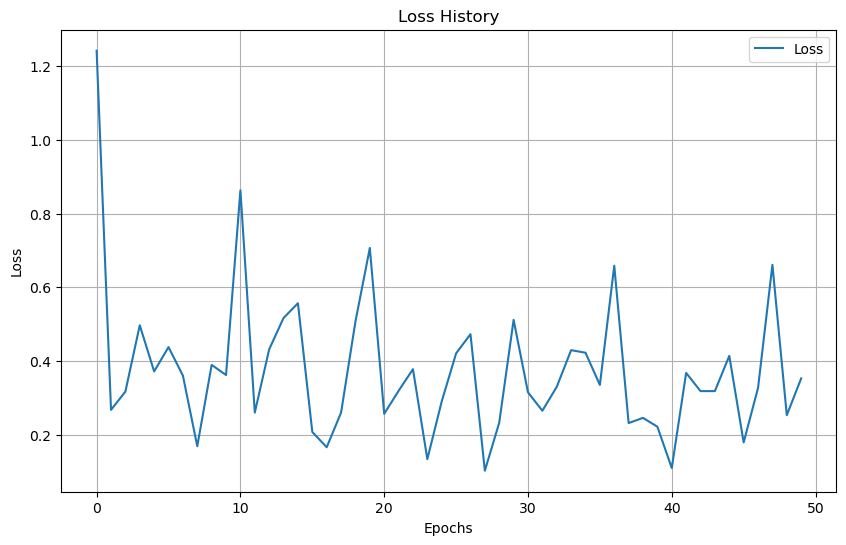

In [8]:
#add your code here--

plt.figure(figsize=(10, 6))
plt.plot(loss_hist, label='Loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#------------------

##### 4.4 Evaluate the trained nn by calcualating the MSE and MAE using using both the training and test sets. 10 points

In [9]:
#add your code here--

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    mse = np.mean((y_pred - y) ** 2)
    
    mae = np.mean(np.abs(y_pred - y))
    
    return mse, mae

train_mse, train_mae = evaluate_model(nn, X_train, y_train)
print(f'Training MSE: {train_mse:.4f}, Training MAE: {train_mae:.4f}')

test_mse, test_mae = evaluate_model(nn, X_test, y_test)
print(f'Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}')

#------------------

Training MSE: 0.7618, Training MAE: 0.6529
Test MSE: 0.8017, Test MAE: 0.6816


#### Task 5(Optional): Students get 10 extra points for getting better test performance using 
    1)different hyperparameters(batch size, lr, and epochs) and/or 
    2)nn design, e.g., different number of hidden nodes, different number of hidden layers, different activation functions

In [13]:
#add your code here--

#------------------